Authored by: Diaa Abuhani


**Data Complexity Measures** <br>
Data Complexity refers to the study of the datasets used as an input to different classifiers. Complexity is influenced by factors such as the shape of the classes, the shape of the decision boundary, the overlap between classes, the proximity among classes, etc. In this Notebook we will go through all the available data complexity measures known as of today along with illustrative examples showing the strengths and weaknesses of each.


Complexity Measures are dependent on four main characteristics: <br>

1.   The number of instances.
2.   The number of classes.
3. The number of features.
4. The instances distribution.

and can be divided into three categories based on the main methodology used in each measure. The following sections analyze each of them accordingly.


**(1) Measures of overlaps in feature values from different classes.**

Overlap measures focus on the effectiveness of a single feature dimension in seperating the classes (can be also the composite effects of a number of dimensions). This category includes:

**1.1 Maximum Fisher’s discriminant ratio (noted as F1)** <br>

F1 ratio (different from the accuracy F1 metric) was first introduced by Ho and Basu (2002) and it computes how seperated are two classes based on a specific feature. This is achieved by comparing the difference between the means with the sum of class variances. The $F_i$ score for a feature $i$ is given by the following equation. <br>

$$
F_i = \frac{(\mu_1 - \mu_2)^2}{σ_1^2 + σ_2^2}
$$

Considering multidimensional problems, the maximum value of $F_i$ over all feature indicate the feature which contributes to the maximal discrimination and is referred to as $F_1$. Hence,

$$
F_1 = \max(F_i)
$$

While Small values of $F_1$ represent strong overlapping. <br>

For illustration Purposes IRIS dataset will be used in this notebook.


In [195]:
#loading the data and scaling it down using standard scaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

Now that we read the data, let's have a look at the four key charaterstics mentioned earlier <br>



number_of_classes: 3
number_of_features: 4


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232


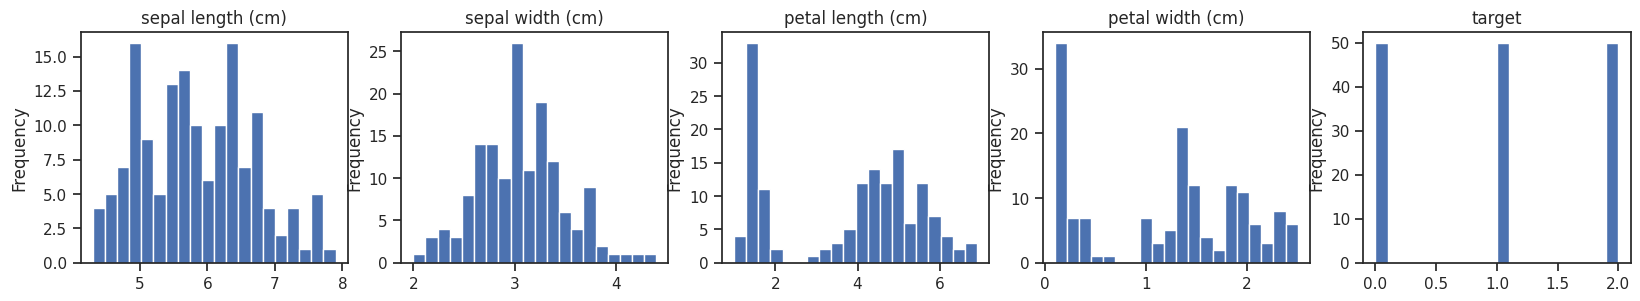

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert the bunch to a DataFrame
iris_df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Add target and target_names to the DataFrame if needed
iris_df['target'] = data.target
iris_df['target_names'] = data.target_names[data.target]
number_of_classes = len(iris_df['target'].unique())
number_of_features = len(iris_df.drop(columns=['target', 'target_names']).columns)

print('number_of_classes:', number_of_classes)
print('number_of_features:', number_of_features)

numeric_columns = iris_df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numeric feature in a single row
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(20, 3))

for i, col in enumerate(numeric_columns):
    iris_df[col].plot(kind='hist', bins=20, ax=axes[i], title=col)

iris_df.describe().head(3)

As we can see, the IRIS dataset contains 3 classes (multiclass problem) which tebds to be more complex than binary problem. The dataset also contains a small number of features (4) and number of instances (150). In terms of instaces distribution, the first two features seems to follow a normal distribution while the last two seems to be skewed to the left. The target shows that the data is balanced. <br>

Now let us calculate the $F_i$ score for each feature.

In [197]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
iris_df = pd.DataFrame(data=iris.data, columns=columns[:-1])
iris_df['target'] = iris.target

# Scale the entire dataset using StandardScaler
scaler = StandardScaler()
iris_scaled = pd.DataFrame(scaler.fit_transform(iris_df.iloc[:, :-1]), columns=columns[:-1])
iris_scaled['target'] = iris_df['target']

# Calculate mean and variance for each feature and each class
class_means = iris_scaled.groupby('target').mean()
class_variances = iris_scaled.groupby('target').var()

# Print the results
print("Mean for each feature and each class:")
print(class_means)

print("\nVariance for each feature and each class:")
print(class_variances)


Mean for each feature and each class:
        sepal_length  sepal_width  petal_length  petal_width
target                                                      
0          -1.014579     0.853263     -1.304987    -1.254893
1           0.112282    -0.661432      0.285324     0.166734
2           0.902297    -0.191831      1.019663     1.088159

Variance for each feature and each class:
        sepal_length  sepal_width  petal_length  petal_width
target                                                      
0           0.182418     0.761420      0.009743     0.019244
1           0.391167     0.521795      0.071335     0.067759
2           0.593642     0.551123      0.098397     0.130702


In [198]:
Fs = []
for col in class_means.columns:
  F = 0
  for i in range(len(class_means[col])):
      for j in range(i + 1, len(class_means[col])):
          m_diff = (class_means[col][j] - class_means[col][i]) ** 2
          v_summ = class_variances[col][j] + class_variances[col][i]
          Fi = m_diff / v_summ
          F += Fi
  Fs.append(F)
print(Fs)
print("F1 = ", np.array(Fs).max())

[7.582273507540461, 2.825609473089161, 84.34297915349867, 64.11991020776048]
F1 =  84.34297915349867


Hence, the $F_1$ score for IRIS dataset 84.34 which means that Feature 2 "Petal Length" provides the highest discrimination between the three classes. While feature 1 "sepal_width" provides the highest overlapping. Let us visualize that and see if it makes sense.

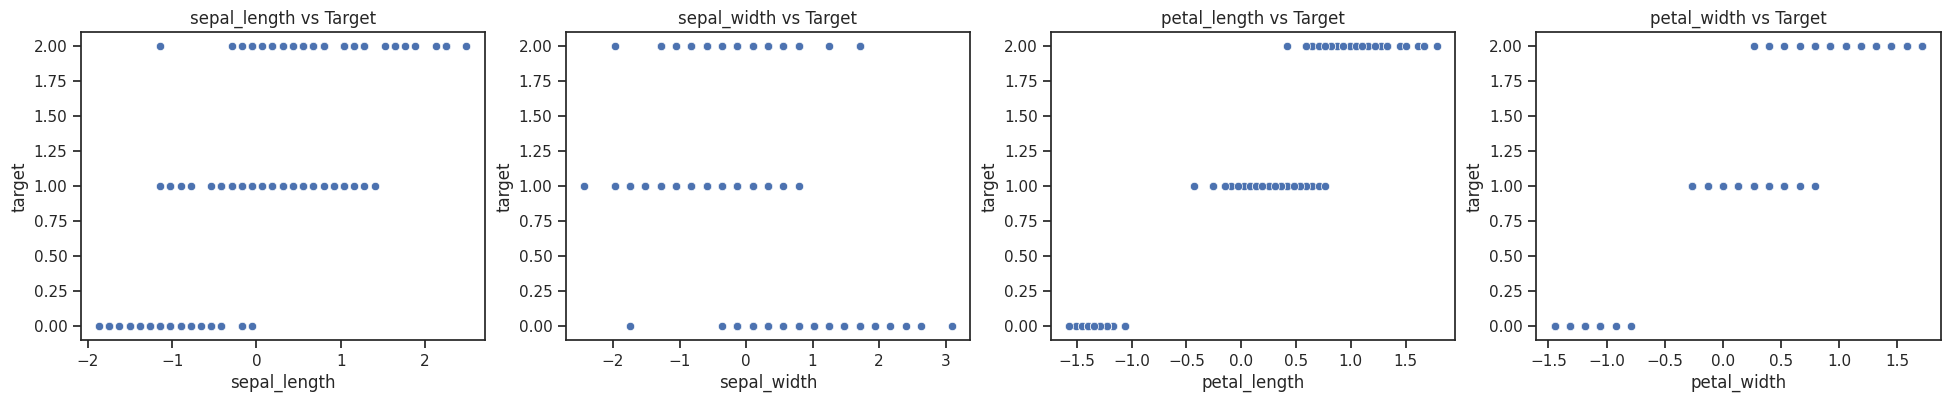

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Set the style of seaborn
sns.set(style="ticks")

# Create separate scatter plots for each feature against the target variable
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

fig, axes = plt.subplots(1, len(features), figsize=(24, 4))

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y="target", data=iris_scaled, markers=["o", "s", "D"], ax=axes[i])
    axes[i].set_title(f"{feature} vs Target")

plt.show()

The results are in-line with the graphs above. As can be seen, the feature "petal_length" had the highest F1 score while "sepal_with" indicated the highest overlap. Looking at the graphs above, the small distances between instances of each class using feature "petal_length" makes it easier to classify using simple approaches (linear model) when compared to other scatter plots. This is also due to the minimal overlap between the instances at each class <br>

**Note: In a multi-dimensional problem like the one above, the Maximum F score determines the complexity of the data regardless of the other features values.**

**(2) Volume of overlap region (noted as F2)**

To further understand the previous example, a very intuitive thing to do is to calculate the overlap between these classes numerically. This can be done by simply calculating the spread distance of each class by finding the difference between the two end points. This can be formulated as following:


$$
F_2 = \prod_{i} \frac{\min(\max(f_i, c_1), \max(f_i, c_2)) - \max(\min(f_i, c_1), \min(f_i, c_2))}{\max(\max(f_i, c_1)\max(f_i, c_2)) - \min(\min(f_i, c_1), \min(f_i, c_2))}
$$

In [289]:
stats = iris_scaled.groupby('target').describe().loc[:, (slice(None), ['min', 'max'])]
stats

sepal_length           sepal_width           petal_length  \
                    min       max         min       max          min   
target                                                                 
setosa        -1.870024 -0.052506   -1.743357  3.090775    -1.567576   
versicolor    -1.143017  1.401508   -2.433947  0.788808    -0.430828   
virginica     -1.143017  2.492019   -1.973554  1.709595     0.421734   

                     petal_width            
                 max         min       max  
target                                      
setosa     -1.056039   -1.447076 -0.788916  
versicolor  0.762758   -0.262387  0.790671  
virginica   1.785832    0.264142  1.712096

In [313]:
F2 = 1
for feature in iris_scaled.drop(columns='target').columns:
  for i in range(len(stats[feature]['min'])):
    for j in range(len(stats[feature]['min'])):
      if i != j:
        min1 = stats[feature]['min'][i]
        min2 = stats[feature]['min'][j]
        max1 = stats[feature]['max'][i]
        max2 = stats[feature]['max'][j]
        nom = min(max1, max2) - max(min1, min2)
        dom = max(max1, max2) - min(min1, min2)
        F2i = nom / dom
  F2 = F2 * F2i
  print("updated F2 score:", F2)
print("F2 score:",F2)

updated F2 score: 0.6999999999999998
updated F2 score: 0.4666666666666666
updated F2 score: 0.07179487179487172
updated F2 score: 0.019145299145299128
F2 score: 0.019145299145299128


A low $F_2$ Score indicates small overlap volume. The range of the $F_2$ metric is [0, 1].

**(3) Maximal (individual) feature efficiency (noted as F3)** <br>

The third and last overlapping measure is concerned with the number of instances that do not fall within the range of overlap. Small values of $F_3$ represents high overlap and hence difficult problem. As its a fraction, the value of $F_3$ ranges between [0,1]. To calculate this one can simply find the second max and min then find the count of the instances outside that range and divide it by the number of instances. I am not exactly sure how that would be put into a mathematical equation but yeah it should work 😆. <br>

Here is my shot on this: <br>
$$
F_3 = \frac{\#x_i \quad ∀ \quad x_i \in (\min_2 < x_i < \max_2)}{\#x_i}
$$


In [321]:
F3 = []
for feature in iris_scaled.drop(columns='target').columns:
  # Finding the second minimum value
  second_min = stats[feature]['min'].nsmallest(2).iloc[-1]

  # Finding the second maximum value
  second_max =  stats[feature]['max'].nlargest(2).iloc[-1]

  total_instances = iris_scaled.count()[0]

  out_pts = ( iris_scaled[feature] > second_max).sum() + ( iris_scaled[feature] < second_min).sum()

  F3i = out_pts / total_instances
  F3.append(F3i)
  print('F3 for feature', feature, '=', F3i)

print('F3 = ', np.array(F3).max())

F3 for feature sepal_length = 0.18666666666666668
F3 for feature sepal_width = 0.04666666666666667
F3 for feature petal_length = 0.56
F3 for feature petal_width = 0.56
F3 =  0.56


$F_3$ shows that feature 2 and 3 can discriminate as much as 56% of the points as they are not overlapping at all which is consistent with the findings from $F_1$ and $F_2$.